Import the required Libraries and Load the Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [2]:
print(customers)

    CustomerID        CustomerName         Region  SignupDate
0        C0001    Lawrence Carroll  South America  2022-07-10
1        C0002      Elizabeth Lutz           Asia  2022-02-13
2        C0003      Michael Rivera  South America  2024-03-07
3        C0004  Kathleen Rodriguez  South America  2022-10-09
4        C0005         Laura Weber           Asia  2022-08-15
..         ...                 ...            ...         ...
195      C0196         Laura Watts         Europe  2022-06-07
196      C0197    Christina Harvey         Europe  2023-03-21
197      C0198         Rebecca Ray         Europe  2022-02-27
198      C0199      Andrea Jenkins         Europe  2022-12-03
199      C0200         Kelly Cross           Asia  2023-06-11

[200 rows x 4 columns]


Check if there are any missing or null values in any of the Datasets

In [3]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


Convert TransactionDate and SignUp into Datetime Format

In [4]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# **EDA**

**1. No of Customers based on Regions**

In [12]:
region_counts = customers['Region'].value_counts()
print(region_counts)

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


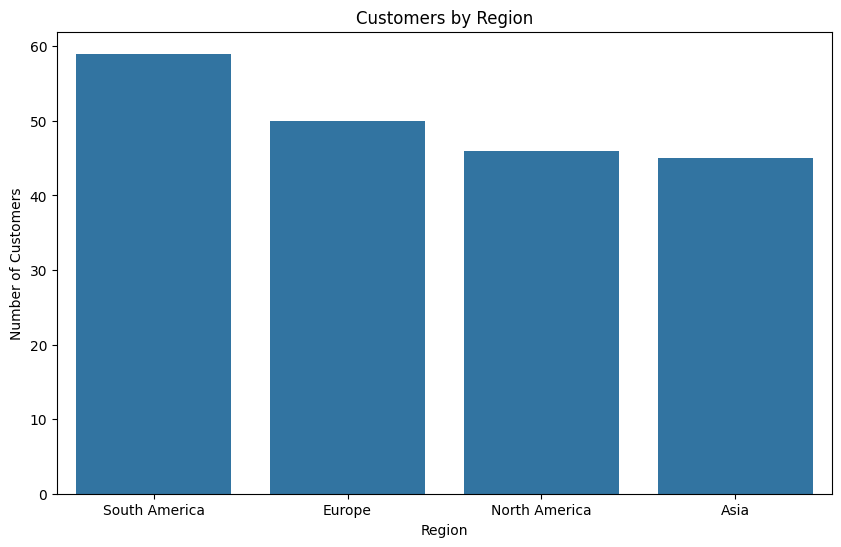

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title("Customers by Region")
plt.ylabel("Number of Customers")
plt.xlabel("Region")
plt.show()

**2. Customer SignUps trend over Years**

In [27]:
signup_trends = customers['SignupDate'].dt.year.value_counts().sort_index()
print(signup_trends)

SignupDate
2022    64
2023    57
2024    79
Name: count, dtype: int64


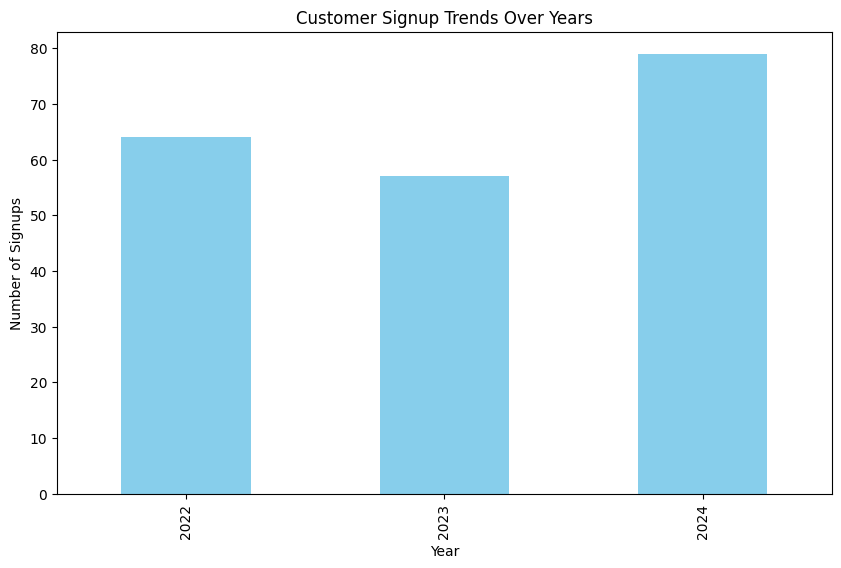

In [24]:
plt.figure(figsize=(10, 6))
signup_trends.plot(kind='bar', color='skyblue')
plt.title("Customer Signup Trends Over Years")
plt.ylabel("Number of Signups")
plt.xlabel("Year")
plt.show()

**3. Total Sales by Product Category**

In [25]:
top_products = transactions.groupby('ProductID')['Quantity'].sum().nlargest(10)
sales_by_category = transactions.merge(products, on='ProductID').groupby('Category')['TotalValue'].sum()
print(sales_by_category)

Category
Books          192147.47
Clothing       166170.66
Electronics    180783.50
Home Decor     150893.93
Name: TotalValue, dtype: float64


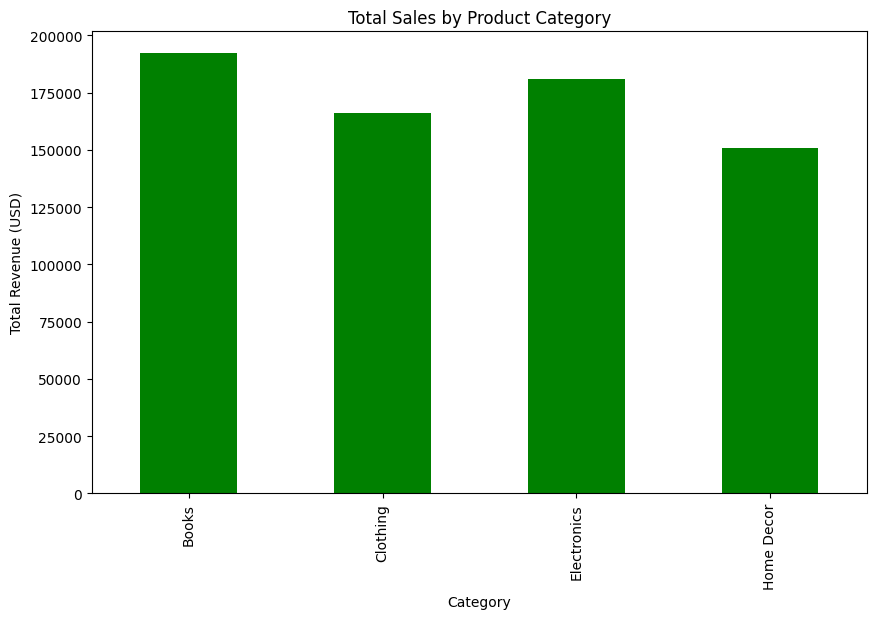

In [26]:
plt.figure(figsize=(10, 6))
sales_by_category.plot(kind='bar', color='green')
plt.title("Total Sales by Product Category")
plt.ylabel("Total Revenue (USD)")
plt.xlabel("Category")
plt.show()

**4. Monthly Sales**

In [9]:
transactions['Month'] = transactions['TransactionDate'].dt.month
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()
print(monthly_sales)

Month
1     66376.39
2     51459.27
3     47828.73
4     57519.06
5     64527.74
6     48771.18
7     71366.39
8     63436.74
9     70603.75
10    47063.22
11    38224.37
12    62818.72
Name: TotalValue, dtype: float64


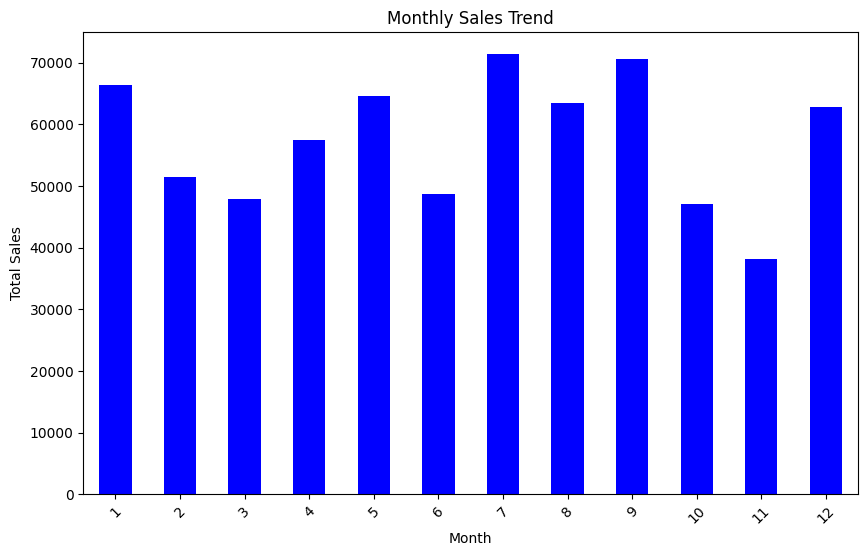

In [22]:
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='blue')
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

**5. Most Valuable Customers**

In [10]:
high_value_customers = transactions.groupby('CustomerID')['TotalValue'].sum().nlargest(10)
print(high_value_customers)

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


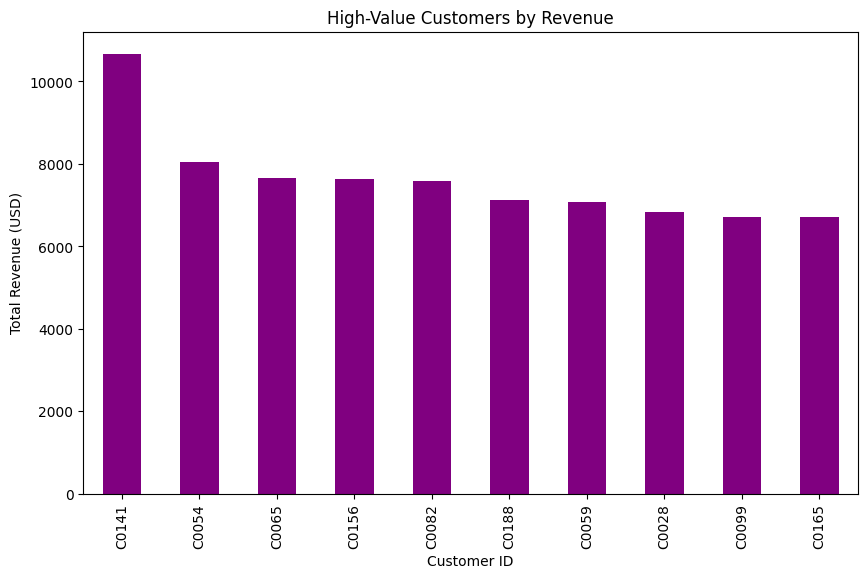

In [18]:
plt.figure(figsize=(10, 6))
high_value_customers.plot(kind='bar', color='purple')
plt.title("High-Value Customers by Revenue")
plt.ylabel("Total Revenue (USD)")
plt.xlabel("Customer ID")
plt.show()